In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# current working directory
PATH = r"C:\Users\doosti\Dropbox (Chapman)\Research\Research Projects\Fitness\Data"

In [5]:
# Loading data files
performance = pd.read_csv(os.path.join(PATH, 'performance.csv'))
creator_id_convert = pd.read_csv(os.path.join(PATH, 'creator_id_convert.csv'))
trend = pd.read_csv(os.path.join(PATH, 'channel_trends_to_stata.csv'))

In [23]:
creator_id_convert.head()

,creator_id,youtube_id
0,nGdL7FhhGC,yta_FKE7WVJfvaHW5q283SxchA
1,292js2E5nD03YGFoX01,yta__EdJML22is1p0n5JXeh5QQ
2,2zNDCwKoz03Z65e601,yta_eP4oj6TsUlnlzQqUzKxUjg
3,3r2vvJJmur03WAUnq01,yta_oR05_B9n4d8jY0vB_wCIhQ
4,AN2sJuJhwS03Y4JM201,yta_CuVOIe5OFq5OznI6XWwKTA


In [6]:
# replacing gid (youtube) creator_id (gid) with tubular creator_id
performance['creator_id'] = performance.merge(creator_id_convert, left_on='creator_id', right_on='youtube_id', how='left').creator_id_y.values
performance.head()

,creator_id,views,views_per_upload,engagements,engagements_per_upload,uploads_90,uploads,followers,followers_30,followers_growth,first_upload,influencer_score
0,nGdL7FhhGC,1381594342,1.892595e+06,18871172,25850.920548,9,730,12200000,100000,0.008197,2012-09-05,708.980228
1,292js2E5nD03YGFoX01,137997485,2.851188e+05,2940642,6075.706612,62,484,249000,9000,0.036145,2019-11-20,394.318588
2,2zNDCwKoz03Z65e601,28311950,3.011910e+05,1052895,11201.010638,39,94,261000,89000,0.340996,2022-07-23,579.619315
3,3r2vvJJmur03WAUnq01,25683510,1.756738e+04,861873,589.516416,57,1462,167000,47000,0.281437,2021-08-24,524.125076
4,AN2sJuJhwS03Y4JM201,53487927,7.470381e+04,1009452,1409.849162,46,716,243000,22000,0.090535,2019-09-24,558.583995


<Axes: >

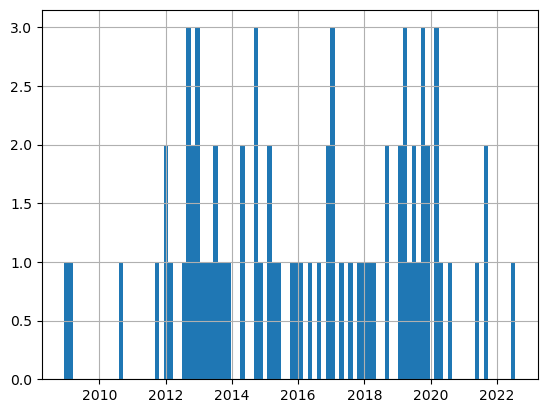

In [7]:
performance['first_upload_date'] = pd.to_datetime(performance['first_upload'])
performance.first_upload_date.hist(bins=100)

<Axes: >

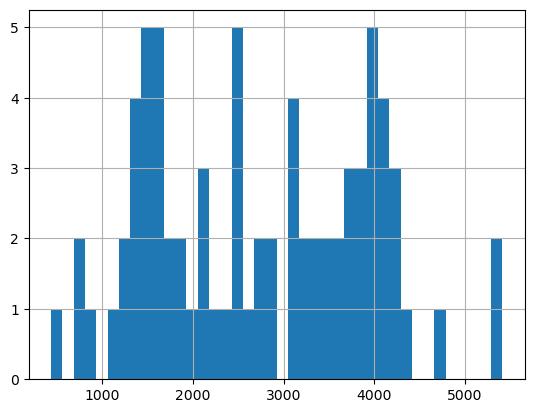

In [27]:
# calculating the number of days between first upload and october 1st, 2023
performance['days_since_first_upload'] = (pd.to_datetime('2023-10-01') - performance['first_upload_date']).dt.days
# histogram of days since first upload
performance.days_since_first_upload.hist(bins=40)

### Moderators

In [28]:
# views: high_view, low_view
performance['high_view'] = performance['views'] > performance['views'].median()
# views_per_upload: high_view_per_upload, low_view_per_upload
performance['high_view_per_upload'] = performance['views_per_upload'] > performance['views_per_upload'].median()
# engagements: high_engagement, low_engagement
performance['high_engagement'] = performance['engagements'] > performance['engagements'].median()
# engagements_per_upload: high_engagement_per_upload, low_engagement_per_upload
performance['high_engagement_per_upload'] = performance['engagements_per_upload'] > performance['engagements_per_upload'].median()
# uploads: high_uploads, low_uploads
performance['high_num_videos'] = performance['uploads'] > performance['uploads'].median()
# followers: high_followers, low_followers
performance['high_followers'] = performance['followers'] > performance['followers'].median()
# followers_growth: high_followers_growth, low_followers_growth
performance['high_followers_growth'] = performance['followers_growth'] > performance['followers_growth'].median()
# influencer_score: high_influencer_score, low_influencer_score
performance['high_influencer_score'] = performance['influencer_score'] > performance['influencer_score'].median()
# days_since_first_upload: high_days_since_first_upload, low_days_since_first_upload
performance['high_tenure'] = performance['days_since_first_upload'] > performance['days_since_first_upload'].median()

# preview of the data
performance.head()

,creator_id,views,views_per_upload,engagements,engagements_per_upload,uploads_90,uploads,followers,followers_30,followers_growth,...,days_since_first_upload,high_view,high_view_per_upload,high_engagement,high_engagement_per_upload,high_num_videos,high_followers,high_followers_growth,high_influencer_score,high_tenure
0,nGdL7FhhGC,1381594342,1.892595e+06,18871172,25850.920548,9,730,12200000,100000,0.008197,...,4043,True,True,True,True,True,True,False,True,True
1,292js2E5nD03YGFoX01,137997485,2.851188e+05,2940642,6075.706612,62,484,249000,9000,0.036145,...,1411,True,True,True,True,True,True,True,True,False
2,2zNDCwKoz03Z65e601,28311950,3.011910e+05,1052895,11201.010638,39,94,261000,89000,0.340996,...,435,True,True,True,True,False,True,True,True,False
3,3r2vvJJmur03WAUnq01,25683510,1.756738e+04,861873,589.516416,57,1462,167000,47000,0.281437,...,768,True,False,True,False,True,True,True,True,False
4,AN2sJuJhwS03Y4JM201,53487927,7.470381e+04,1009452,1409.849162,46,716,243000,22000,0.090535,...,1468,True,True,True,True,True,True,True,True,False


In [32]:
# merging performance and trend data
cols = ['creator_id', 'total_views', 'views_per_upload', 'total_engagements',
       'engagements_per_upload', 'uploads_90', 'total_uploads', 'total_followers',
       'followers_30', 'followers_growth', 'first_upload', 'influencer_score',
       'first_upload_date', 'days_since_first_upload', 'high_view',
       'high_view_per_upload', 'high_engagement', 'high_engagement_per_upload',
       'high_num_videos', 'high_followers', 'high_followers_growth',
       'high_influencer_score', 'high_tenure']
performance.columns = cols
trend.merge(performance, on='creator_id', how='left').to_csv(os.path.join(PATH, 'channel_trends_to_stata_performance.csv'), index=False)

In [8]:
# changing tenure over time
trend = pd.read_csv(os.path.join(PATH, 'channel_trends_to_stata_performance.csv'))
trend.head()

,creator_id,date,views,engagements,uploads,followers,avg_challenge,publish_date,challenge_dummy,total_views,...,days_since_first_upload,high_view,high_view_per_upload,high_engagement,high_engagement_per_upload,high_num_videos,high_followers,high_followers_growth,high_influencer_score,high_tenure
0,YhItxj8Ap9,2020-09-15,8173,153,0,0.0,NaN,NaN,0,22747130,...,3874,True,False,True,False,True,True,False,False,True
1,YhItxj8Ap9,2020-09-16,9924,392,2,0.0,0.0,2020-09-16,0,22747130,...,3874,True,False,True,False,True,True,False,False,True
2,YhItxj8Ap9,2020-09-16,9924,392,2,0.0,0.0,2020-09-16,0,22747130,...,3874,True,False,True,False,True,True,False,False,True
3,YhItxj8Ap9,2020-09-17,9976,369,1,0.0,0.0,2020-09-17,0,22747130,...,3874,True,False,True,False,True,True,False,False,True
4,YhItxj8Ap9,2020-09-18,9279,223,0,0.0,NaN,NaN,0,22747130,...,3874,True,False,True,False,True,True,False,False,True


0    2763
1    2764
2    2764
3    2765
4    2766
Name: days_since_first_upload, dtype: int64


<Axes: >

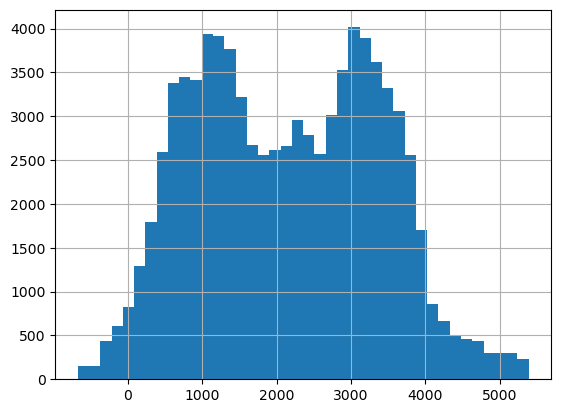

In [9]:
trend['first_upload_date'] = pd.to_datetime(trend['first_upload'])
trend['date'] = pd.to_datetime(trend['date'])
trend['days_since_first_upload'] = (trend['date'] - trend['first_upload_date']).dt.days
print(trend.days_since_first_upload.head())
trend.days_since_first_upload.hist(bins=40)

In [14]:
# calculate the cumulative sum of uploads and followers over time
trend['cum_uploads'] = trend.groupby('creator_id')['uploads'].cumsum()
trend['cum_followers'] = trend.groupby('creator_id')['followers'].cumsum()
trend['cum_challenges'] = trend.groupby('creator_id')['challenge_dummy'].cumsum()
trend.head()

,creator_id,date,views,engagements,uploads,followers,avg_challenge,publish_date,challenge_dummy,total_views,...,high_engagement,high_engagement_per_upload,high_num_videos,high_followers,high_followers_growth,high_influencer_score,high_tenure,cum_uploads,cum_followers,cum_challenges
0,YhItxj8Ap9,2020-09-15,8173,153,0,0.0,NaN,NaN,0,22747130,...,True,False,True,True,False,False,True,0,0.0,0
1,YhItxj8Ap9,2020-09-16,9924,392,2,0.0,0.0,2020-09-16,0,22747130,...,True,False,True,True,False,False,True,2,0.0,0
2,YhItxj8Ap9,2020-09-16,9924,392,2,0.0,0.0,2020-09-16,0,22747130,...,True,False,True,True,False,False,True,4,0.0,0
3,YhItxj8Ap9,2020-09-17,9976,369,1,0.0,0.0,2020-09-17,0,22747130,...,True,False,True,True,False,False,True,5,0.0,0
4,YhItxj8Ap9,2020-09-18,9279,223,0,0.0,NaN,NaN,0,22747130,...,True,False,True,True,False,False,True,5,0.0,0


In [20]:
trend.columns

Index(['creator_id', 'date', 'views', 'engagements', 'uploads', 'followers',
       'avg_challenge', 'publish_date', 'challenge_dummy', 'total_views',
       'views_per_upload', 'total_engagements', 'engagements_per_upload',
       'uploads_90', 'total_uploads', 'total_followers', 'followers_30',
       'followers_growth', 'first_upload', 'influencer_score',
       'first_upload_date', 'days_since_first_upload', 'high_view',
       'high_view_per_upload', 'high_engagement', 'high_engagement_per_upload',
       'high_num_videos', 'high_followers', 'high_followers_growth',
       'high_influencer_score', 'high_tenure', 'cum_uploads', 'cum_followers',
       'cum_challenges'],
      dtype='object')

In [15]:
# save the second version of the data
trend.to_csv(os.path.join(PATH, 'channel_trends_to_stata_performance_v2.csv'), index=False)

### Aggregate analysis

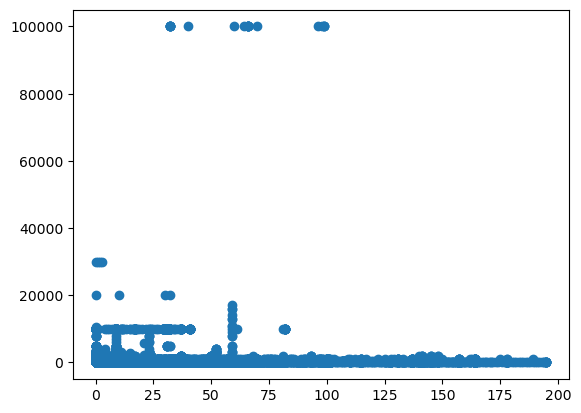

In [18]:
# create a scatter plot of cumulative challenges and cumulative followers
plt.scatter(trend['cum_challenges'], trend['cum_followers'])

,creator_id,challenge_dummy,uploads,total_uploads,followers,total_followers,views,total_views,followers_growth
0,262h9yTG1f03Nobo501,37,159,261,328545.0,333000,22086467,22309517,0.036036
1,292js2E5nD03YGFoX01,16,597,484,281179.0,249000,157223471,137997485,0.036145
2,2S2dKVP5pj03XEUWR01,18,315,305,27188.0,27400,4495923,4480201,0.164234
3,2S2kKCLvgH03TGeot01,0,45,147,31713.0,35200,2329557,2531785,0.051136
4,2bgiN7kx303QPi1601,4,263,447,7195.0,19000,938881,2078717,0.010526


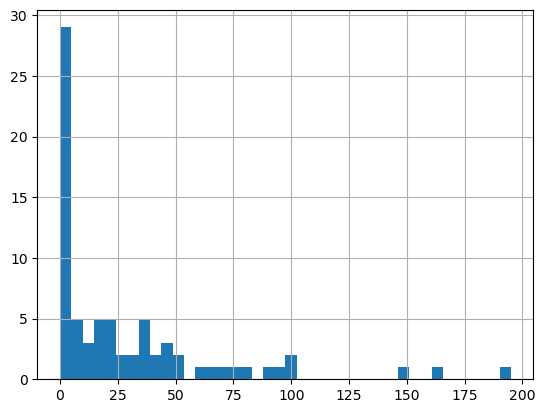

In [26]:
trend.groupby('creator_id').challenge_dummy.sum().hist(bins=40)

grouped = trend.groupby('creator_id').challenge_dummy.sum().reset_index()
grouped['uploads'] = trend.groupby('creator_id').uploads.sum().values
grouped['total_uploads'] = trend.groupby('creator_id').total_uploads.first().values
grouped['followers'] = trend.groupby('creator_id').followers.sum().values
grouped['total_followers'] = trend.groupby('creator_id').total_followers.first().values
grouped['views'] = trend.groupby('creator_id').views.sum().values
grouped['total_views'] = trend.groupby('creator_id').total_views.first().values
grouped['followers_growth'] = trend.groupby('creator_id').followers_growth.first().values
grouped.head()

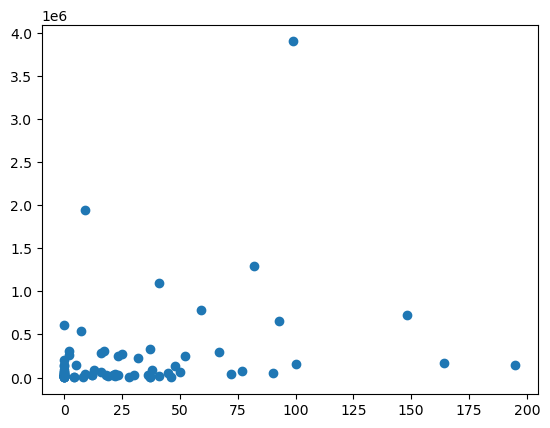

In [29]:
# scatter plot of cumulative challenges and cumulative followers
plt.scatter(grouped['challenge_dummy'], grouped['followers'])

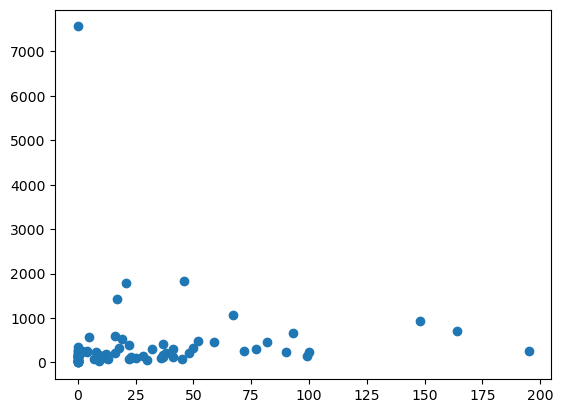

In [30]:
# scatter plot of cumulative challenges and cumulative uploads
plt.scatter(grouped['challenge_dummy'], grouped['uploads'])

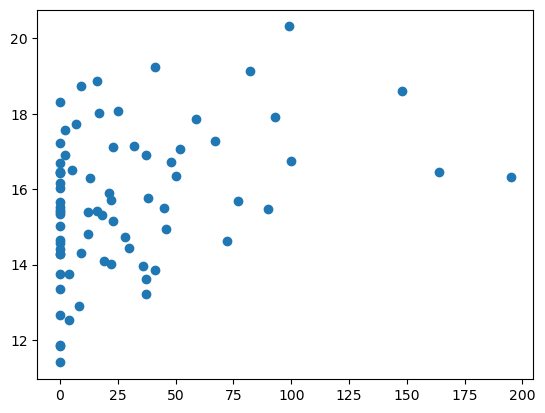

In [33]:
# scatter plot of cumulative challenges and cumulative views (log scale)
plt.scatter(grouped['challenge_dummy'], np.log(grouped['views']))

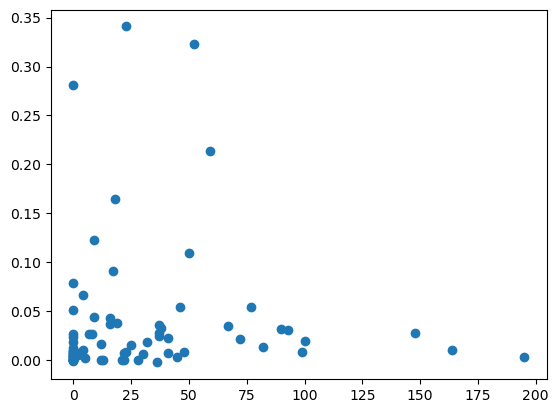

In [32]:
# scatter plot of cumulative challenges and cumulative followers growth
plt.scatter(grouped['challenge_dummy'], grouped['followers_growth'])